In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns


import tensorflow as tf

In [2]:
# import tensorflow as tf

# # GPU device Check.
# device_name = tf.test.gpu_device_name()
# if device_name == '/device:GPU:0':
#     print('Found GPU at: {}'.format(device_name))
# else:
#     raise SystemError('GPU device not found')
    
# import torch

# # If there's a GPU available...
# if torch.cuda.is_available():    

#     # PyTorch use the GPU.    
#     device = torch.device("cuda")

#     print('There are %d GPU(s) available.' % torch.cuda.device_count())

#     print('We will use the GPU:', torch.cuda.get_device_name(0))

# # If not...
# else:
#     print('No GPU available, using the CPU instead.')
#     device = torch.device("cpu")

In [3]:
# Reading data
train = pd.read_csv('../input/higgs-boson/training.zip')
test = pd.read_csv('../input/higgs-boson/test.zip')

print(train.shape,test.shape)

(250000, 33) (550000, 31)


In [4]:
train

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [5]:
print(train.columns.values,'\n')
print(test.columns.values)

['EventId' 'DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis'
 'DER_pt_h' 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet'
 'DER_prodeta_jet_jet' 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt'
 'DER_pt_ratio_lep_tau' 'DER_met_phi_centrality' 'DER_lep_eta_centrality'
 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta'
 'PRI_lep_phi' 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt' 'Weight' 'Label'] 

['EventId' 'DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis'
 'DER_pt_h' 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet'
 'DER_prodeta_jet_jet' 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt'
 'DER_pt_ratio_lep_tau' 'DER_met_phi_centrality' 'DER_lep_eta_centrality'
 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta'
 'PRI_lep_phi' 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_j

In [6]:
train = train.drop(['Weight'], axis=1)

b    164333
s     85667
Name: Label, dtype: int64


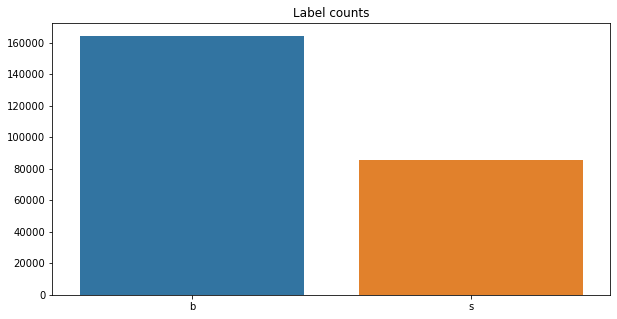

In [7]:
print(train['Label'].value_counts())

rcParams['figure.figsize'] = 10,5
sb.barplot(x = train['Label'].value_counts().index, y = train['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

In [8]:
# getting dummy variables column

enc = LabelEncoder()

train['Label'] = enc.fit_transform(train['Label'])
train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [9]:
y = train["Label"]
X = train
X_test = test

In [10]:
X.set_index(['EventId'],inplace = True)
X_test.set_index(['EventId'],inplace = True)
X = X.drop(['Label'], axis=1)

X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [11]:
X_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [12]:
train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,0.342668
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,0.474603
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,0.000000
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,1.000000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,1.000000


In [13]:
#Normalizing

from sklearn.preprocessing import normalize

X = normalize(X)
X_test = normalize(X_test)

1-DNN

In [14]:
# from sklearn.model_selection import StratifiedKFold
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D,Activation, BatchNormalization
# from tensorflow.keras.models import Sequential

# BATCH_SIZE = 8
# n_fold = 5

# kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
# cvscores = []  
# for train, test in kfold.split(X, y): 
#   # create model 
#     model = Sequential() 
#     model.add(Dense(1024, input_dim=30, activation='relu'))
#     model.add(Dropout(0.8)) 
#     model.add(Dense(1024, activation='relu')) 
#     model.add(Dropout(0.8)) 
#     model.add(Dense(512, activation='relu')) 
#     model.add(Dropout(0.8)) 
#     model.add(Dense(2,activation='softmax'))
#     # Compile model
#     opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#     # Fit the model
#     model.fit(X[train], y[train],validation_data=(X[train], y[train]), epochs=10, batch_size=BATCH_SIZE, verbose=0)
#     # evaluate the model
#     scores = model.evaluate(X[test], y[test], verbose=0)
#     print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     cvscores.append(scores[1] * 100) 
      
#     #prediction     
#     prediction = model.predict(X_test, batch_size=BATCH_SIZE, verbose=0)   
    
# print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))) 

2- XGB

In [15]:
#K Fold Cross Validation

from sklearn.model_selection import KFold


kf = KFold(n_splits=5, random_state=2020, shuffle=True)

for train_index, val_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

TRAIN: [     0      1      2 ... 249996 249997 249998] TEST: [     3     15     16 ... 249966 249972 249999]
TRAIN: [     1      2      3 ... 249997 249998 249999] TEST: [     0      4     11 ... 249986 249991 249992]
TRAIN: [     0      1      3 ... 249995 249998 249999] TEST: [     2      5      7 ... 249994 249996 249997]
TRAIN: [     0      2      3 ... 249997 249998 249999] TEST: [     1     13     14 ... 249981 249985 249990]
TRAIN: [     0      1      2 ... 249996 249997 249999] TEST: [     6      9     20 ... 249993 249995 249998]


In [16]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_val, label=y_val)
# watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# xgb_pars = {'min_child_weight': 100, 'eta': 0.04, 'colsample_bytree': 0.8, 'max_depth': 100,
#             'subsample': 0.75, 'lambda': 2, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 'gamma' : 0,
#             'eval_metric': 'rmse', 'objective': 'reg:linear'}    

# model = xgb.train(xgb_pars, dtrain, 500, watchlist, early_stopping_rounds=250,
#                   maximize=False, verbose_eval=15) 

In [17]:
# dtest = xgb.DMatrix(X_test)

# prediction = model.predict(dtest)  

3-RNN

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(200000, 30)
(200000,)
(50000, 30)
(50000,)


In [19]:
#reshape for rnn

X_train = X_train.reshape(-1, 1, 30)
X_val  = X_val.reshape(-1, 1, 30)
y_train = y_train.values #convert pd to array
y_train = y_train.reshape(-1, 1,)
y_val = y_val.values #convert pd to array
y_val = y_val.reshape(-1, 1,)

In [30]:
X_train.shape

(200000, 1, 30)

In [20]:
from tensorflow.keras.layers import Conv2D,LSTM,LeakyReLU, MaxPooling2D,Concatenate,Input, Dropout, Flatten, Dense, GlobalAveragePooling2D,Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Model


  # create model
    

#input 
input_layer = Input(shape=(1,30))
main_rnn_layer = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(input_layer)

    
#output
rnn = LSTM(32)(main_rnn_layer)
dense = Dense(128)(rnn)
dropout_c = Dropout(0.3)(dense)
classes = Dense(1, activation= LeakyReLU(alpha=0.1),name="class")(dropout_c)

model = Model(input_layer, classes)

# Compile model
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError(),tf.keras.losses.MeanSquaredLogarithmicError()], optimizer="adam")


model.summary()
# Fit the model
history = model.fit(X_train, y_train, 
          epochs = 250, 
          batch_size = 16, 
          validation_data=(X_val,  y_val), 
          callbacks=callbacks)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 30)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 64)             24320     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
class (Dense)                (None, 1)                 129       
Total params: 41,089
Trainable params: 41,089
Non-trainable params: 0
_________________________________________________________

Epoch 54/250
12496/12500 [============================>.] - ETA: 0s - loss: 0.0572
Epoch 00054: ReduceLROnPlateau reducing learning rate to 7.775999838486313e-05.
12500/12500 [==============================] - 69s 6ms/step - loss: 0.0572 - val_loss: 0.0576 - lr: 1.2960e-04
Epoch 55/250
12500/12500 [==============================] - 74s 6ms/step - loss: 0.0571 - val_loss: 0.0571 - lr: 7.7760e-05
Epoch 56/250
12500/12500 [==============================] - 68s 5ms/step - loss: 0.0571 - val_loss: 0.0570 - lr: 7.7760e-05
Epoch 57/250
12500/12500 [==============================] - 69s 6ms/step - loss: 0.0571 - val_loss: 0.0571 - lr: 7.7760e-05
Epoch 58/250
12498/12500 [============================>.] - ETA: 0s - loss: 0.0571
Epoch 00058: ReduceLROnPlateau reducing learning rate to 4.6655999904032795e-05.
12500/12500 [==============================] - 70s 6ms/step - loss: 0.0571 - val_loss: 0.0572 - lr: 7.7760e-05
Epoch 59/250
12500/12500 [==============================] - 72s 6ms/step - loss

12500/12500 [==============================] - 68s 5ms/step - loss: 0.0568 - val_loss: 0.0570 - lr: 1.6927e-07
Epoch 105/250
12500/12500 [==============================] - 64s 5ms/step - loss: 0.0568 - val_loss: 0.0570 - lr: 1.6927e-07
Epoch 106/250
12500/12500 [==============================] - 64s 5ms/step - loss: 0.0568 - val_loss: 0.0570 - lr: 1.6927e-07
Epoch 107/250
12493/12500 [============================>.] - ETA: 0s - loss: 0.0568
Epoch 00107: ReduceLROnPlateau reducing learning rate to 1.0155995937566331e-07.
12500/12500 [==============================] - 65s 5ms/step - loss: 0.0568 - val_loss: 0.0570 - lr: 1.6927e-07
Epoch 108/250
12500/12500 [==============================] - 66s 5ms/step - loss: 0.0568 - val_loss: 0.0570 - lr: 1.0156e-07
Epoch 109/250
12500/12500 [==============================] - 69s 6ms/step - loss: 0.0568 - val_loss: 0.0570 - lr: 1.0156e-07
Epoch 110/250
12500/12500 [==============================] - 66s 5ms/step - loss: 0.0568 - val_loss: 0.0570 - lr:

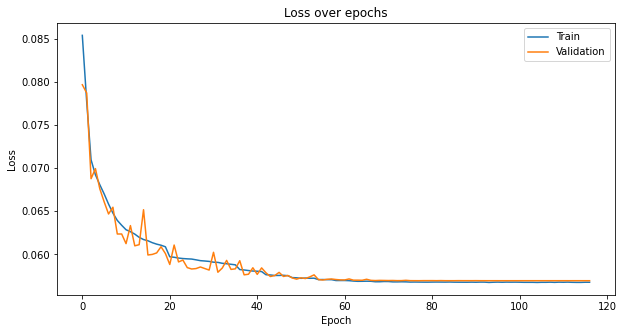

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [29]:
X_test.shape

(550000, 30)

In [31]:
model.load_weights("best_model.h5")

test = X_test #convert pd to array
test = test.reshape(-1, 1,30)


predictions = model.predict(test)

In [43]:
print(predictions.shape)
print(predictions)

(550000, 1)
[[-0.01762744]
 [ 0.06913006]
 [ 0.36910522]
 ...
 [ 0.04759964]
 [ 0.37550092]
 [ 0.14360055]]


In [36]:
sub = pd.read_csv('../input/higgs-boson/random_submission.zip')

In [37]:
sub

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,s
...,...,...,...
549995,899995,46701,s
549996,899996,323731,s
549997,899997,357749,s
549998,899998,486844,b


In [38]:
type(predictions)

numpy.ndarray

In [40]:
pred = np.where(predictions > 0.5, 1, 0)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [44]:
test_predict = pd.Series(pred[:,0])

In [45]:
test_predict

0         0
1         0
2         0
3         1
4         0
         ..
549995    0
549996    0
549997    0
549998    0
549999    0
Length: 550000, dtype: int64

In [46]:
test_predict = pd.DataFrame({"EventId":sub['EventId'],"RankOrder":sub['RankOrder'],"Class":test_predict})
test_predict

,EventId,RankOrder,Class
0,350000,416957,0
1,350001,89624,0
2,350002,519845,0
3,350003,510885,1
4,350004,455944,0
...,...,...,...
549995,899995,46701,0
549996,899996,323731,0
549997,899997,357749,0
549998,899998,486844,0


In [47]:
test_predict = test_predict.replace(1,'s')
test_predict = test_predict.replace(0,'b')
test_predict

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,b
...,...,...,...
549995,899995,46701,b
549996,899996,323731,b
549997,899997,357749,b
549998,899998,486844,b


In [48]:
test_predict['RankOrder'] = test_predict['Class'].argsort().argsort() + 1 # +1 to start at 1

In [49]:
test_predict

,EventId,RankOrder,Class
0,350000,1,b
1,350001,383328,b
2,350002,383322,b
3,350003,405793,s
4,350004,383320,b
...,...,...,...
549995,899995,155432,b
549996,899996,155431,b
549997,899997,155430,b
549998,899998,106192,b


In [50]:
test_predict.to_csv("submission.csv",index=False)